# Steam Reviews Dataset EDA

## 1. Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
file_path = "../dataset/dataset.csv"

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading CSV with default settings: {e}")
    # Try with different encoding options
    try:
        df = pd.read_csv(file_path, encoding='latin1')
        print("Successfully loaded with latin1 encoding")
    except:
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            print("Successfully loaded with utf-8-sig encoding")
        except Exception as e2:
            print(f"Still encountering issues: {e2}")
            # Try reading just the first few lines to diagnose
            import subprocess
            print("File preview:")
            !head -n 5 {file_path}

# Display the first few rows to verify loading
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


## 2. Initial Data Exploration

In [13]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Display column information
print("\nColumn Names:")
print(df.columns.tolist())

# Display data types and memory usage
print("\nData Types and Memory Usage:")
df.info()

Dataset shape: 6417106 rows and 5 columns

Column Names:
['app_id', 'app_name', 'review_text', 'review_score', 'review_votes']

Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [14]:
# Basic statistics for numeric columns
print("Descriptive Statistics for Numeric Columns:")
df.describe(include=[np.number]).T

Descriptive Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
app_id,6417106.00,227469.50,126045.07,10.00,201810.00,239160.00,305620.00,565340.00
review_score,6417106.00,0.64,0.77,-1.00,1.00,1.00,1.00,1.00
review_votes,6417106.00,0.15,0.35,0.00,0.00,0.00,0.00,1.00


In [15]:
# Basic statistics for object columns
print("Descriptive Statistics for Text Columns:")
df.describe(include=['object']).T

Descriptive Statistics for Text Columns:


,count,unique,top,freq
app_name,6233872,9363,PAYDAY 2,88973
review_text,6409801,4473473,Early Access Review,1013351


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values Analysis:")
missing_df[missing_df['Missing Values'] > 0]  # Only show columns with missing values

Missing Values Analysis:


,Missing Values,Percentage
app_name,183234,2.86
review_text,7305,0.11


In [17]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count} ({(duplicate_count/len(df))*100:.2f}% of the dataset)")

# If duplicates exist, show a few examples
if duplicate_count > 0:
    print("\nExample of duplicate entries:")
    df[df.duplicated(keep='first')].head()

Number of duplicate rows: 1796102 (27.99% of the dataset)

Example of duplicate entries:


## 3. Game Analysis

In [18]:
# Count of reviews by game
game_counts = df['app_name'].value_counts().reset_index()
game_counts.columns = ['app_name', 'review_count']

# Display the top games by review count
print("Top 15 Games by Review Count:")
game_counts.head(15)

Top 15 Games by Review Count:


,app_name,review_count
0,PAYDAY 2,88973
1,DayZ,88850
2,Terraria,84828
3,Rust,77037
4,Dota 2,73541
5,Rocket League,54227
6,Undertale,51918
7,Left 4 Dead 2,50980
8,Warframe,48229
9,Grand Theft Auto V,42374


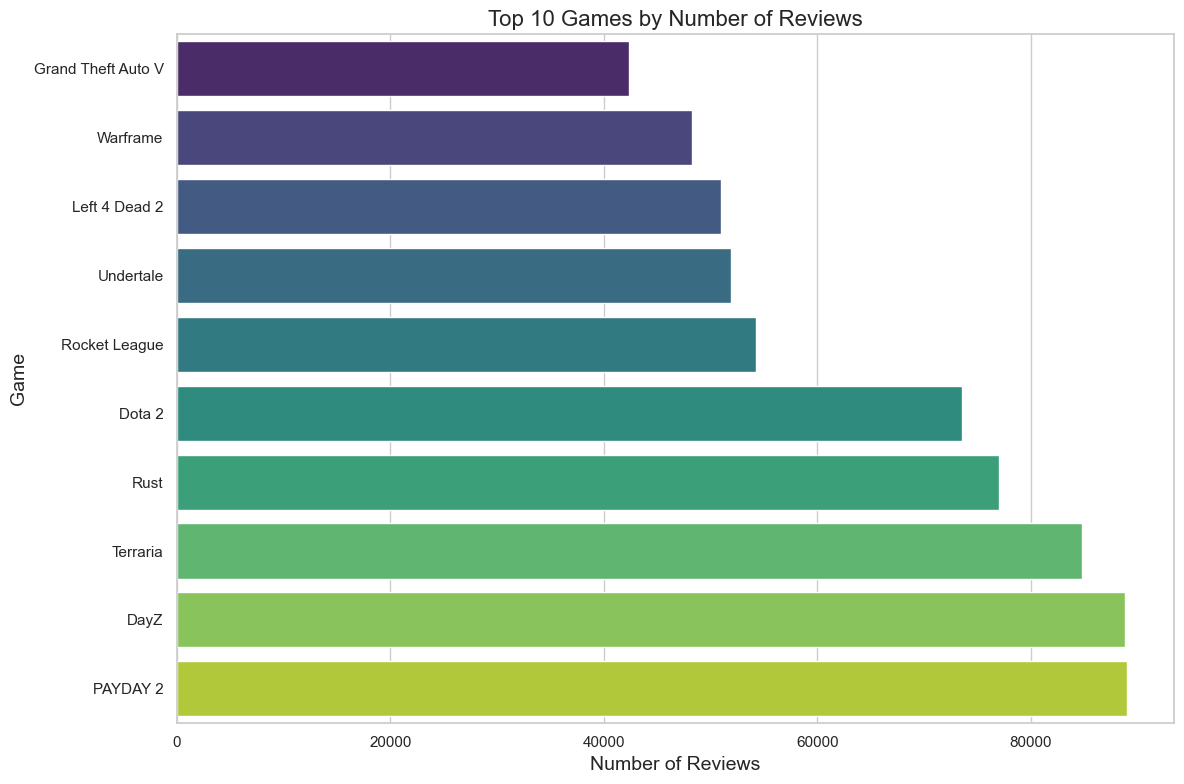

In [19]:
# Visualize top games by review count
plt.figure(figsize=(12, 8))
top_games = game_counts.head(10).sort_values('review_count')

sns.barplot(data=top_games, y='app_name', x='review_count', palette='viridis')
plt.title('Top 10 Games by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.tight_layout()
plt.show()

In [20]:
# Calculate average review score by game
game_avg_scores = df.groupby('app_name')['review_score'].agg(['mean', 'count']).reset_index()
game_avg_scores = game_avg_scores.rename(columns={'mean': 'avg_score', 'count': 'review_count'})
game_avg_scores = game_avg_scores.sort_values('avg_score', ascending=False)

# Filter to games with a minimum number of reviews for statistical significance
min_reviews = 10
top_rated_games = game_avg_scores[game_avg_scores['review_count'] >= min_reviews].head(15)
print(f"Top 15 Highest-Rated Games (with at least {min_reviews} reviews):")
top_rated_games

Top 15 Highest-Rated Games (with at least 10 reviews):


,app_name,avg_score,review_count
8219,The Unwelcomed,1.00,10
8213,The Ultimate DOOM,1.00,48
1090,Blue Rider,1.00,21
1111,Bombslinger,1.00,10
8194,The Tale of a Common Man,1.00,18
4931,Midnight Mysteries 4: Haunted Houdini,1.00,20
4915,Metrico+,1.00,18
4778,Marine Park Empire,1.00,11
8193,The Tale of Doris and the Dragon - Episode 1,1.00,14
1210,Brushwood Buddies,1.00,11


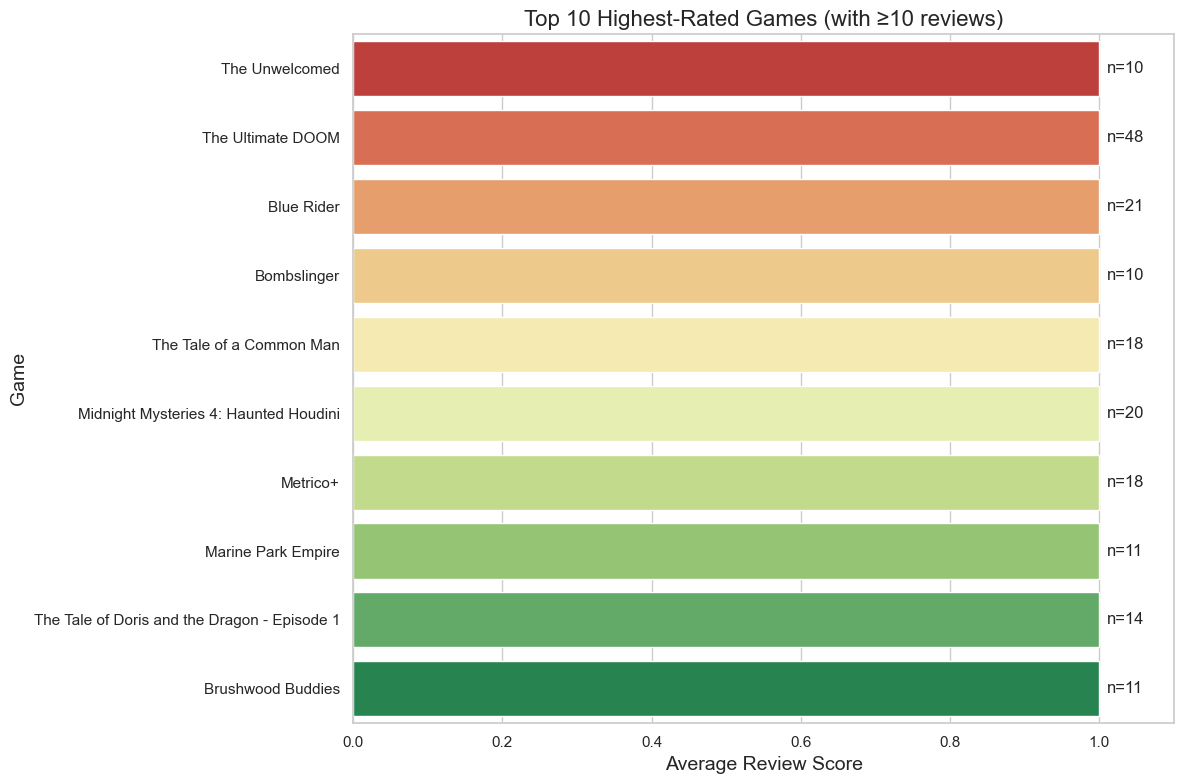

In [21]:
# Visualize top-rated games (with a minimum number of reviews)
plt.figure(figsize=(12, 8))
top_10_rated = top_rated_games.head(10).sort_values('avg_score')

colors = sns.color_palette("RdYlGn", 10)
ax = sns.barplot(data=top_10_rated, y='app_name', x='avg_score', palette=colors)

# Add review count as text
for i, (score, count) in enumerate(zip(top_10_rated['avg_score'], top_10_rated['review_count'])):
    ax.text(score + 0.01, i, f"n={count}", va='center')

plt.title(f'Top 10 Highest-Rated Games (with ≥{min_reviews} reviews)', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.xlim(0, 1.1)  # Assuming scores are between 0 and 1
plt.tight_layout()
plt.show()

In [22]:
# Lowest rated games
lowest_rated_games = game_avg_scores[game_avg_scores['review_count'] >= min_reviews].tail(15).sort_values('avg_score')
print(f"15 Lowest-Rated Games (with at least {min_reviews} reviews):")
lowest_rated_games

15 Lowest-Rated Games (with at least 10 reviews):


,app_name,avg_score,review_count
6203,Raycatcher,-1.00,12
6192,Random Access Murder,-1.00,60
270,Adam and Eve: The Game - Chapter 1,-1.00,10
1193,Brine,-1.00,20
7708,Tales of Destruction,-1.00,14
3098,Fray,-0.94,34
2442,Drunk Wizards,-0.93,28
2483,Dungeon of Gain,-0.91,23
6239,Recovery Search and Rescue Simulation,-0.91,22
4907,Metal Planet,-0.90,21


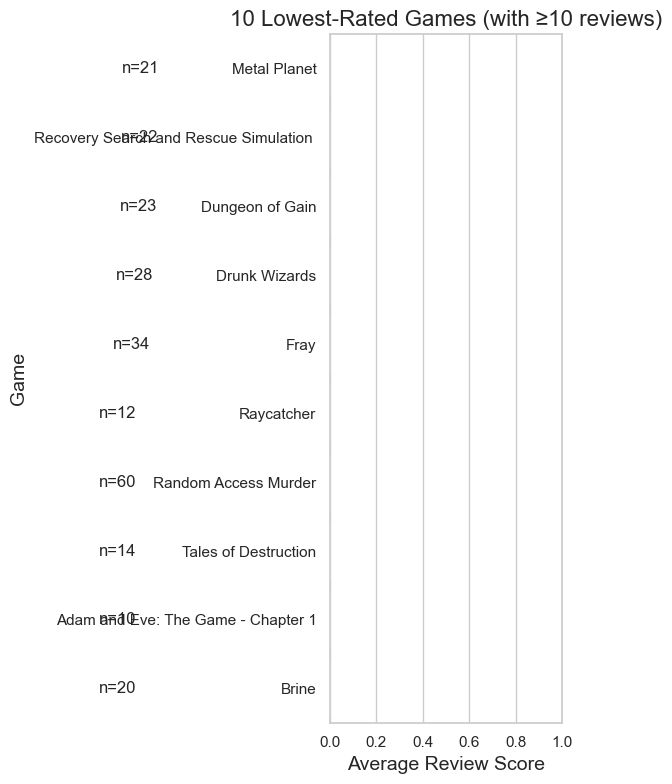

In [23]:
# Visualize lowest-rated games
plt.figure(figsize=(12, 8))
bottom_10_rated = lowest_rated_games.head(10).sort_values('avg_score', ascending=False)

colors = sns.color_palette("RdYlGn_r", 10)
ax = sns.barplot(data=bottom_10_rated, y='app_name', x='avg_score', palette=colors)

# Add review count as text
for i, (score, count) in enumerate(zip(bottom_10_rated['avg_score'], bottom_10_rated['review_count'])):
    ax.text(score + 0.01, i, f"n={count}", va='center')

plt.title(f'10 Lowest-Rated Games (with ≥{min_reviews} reviews)', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.xlim(0, 1.0)  # Assuming scores are between 0 and 1
plt.tight_layout()
plt.show()

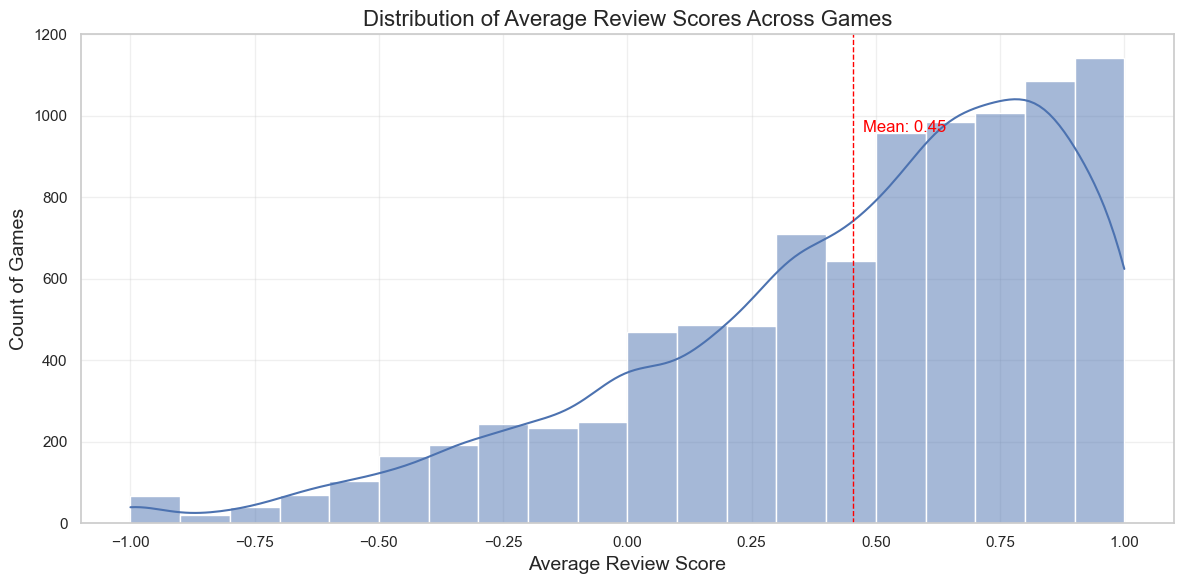

In [24]:
# Distribution of average review scores across all games
plt.figure(figsize=(12, 6))
sns.histplot(game_avg_scores['avg_score'], bins=20, kde=True)
plt.axvline(game_avg_scores['avg_score'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(game_avg_scores['avg_score'].mean() + 0.02, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {game_avg_scores["avg_score"].mean():.2f}', color='red')

plt.title('Distribution of Average Review Scores Across Games', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Count of Games', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

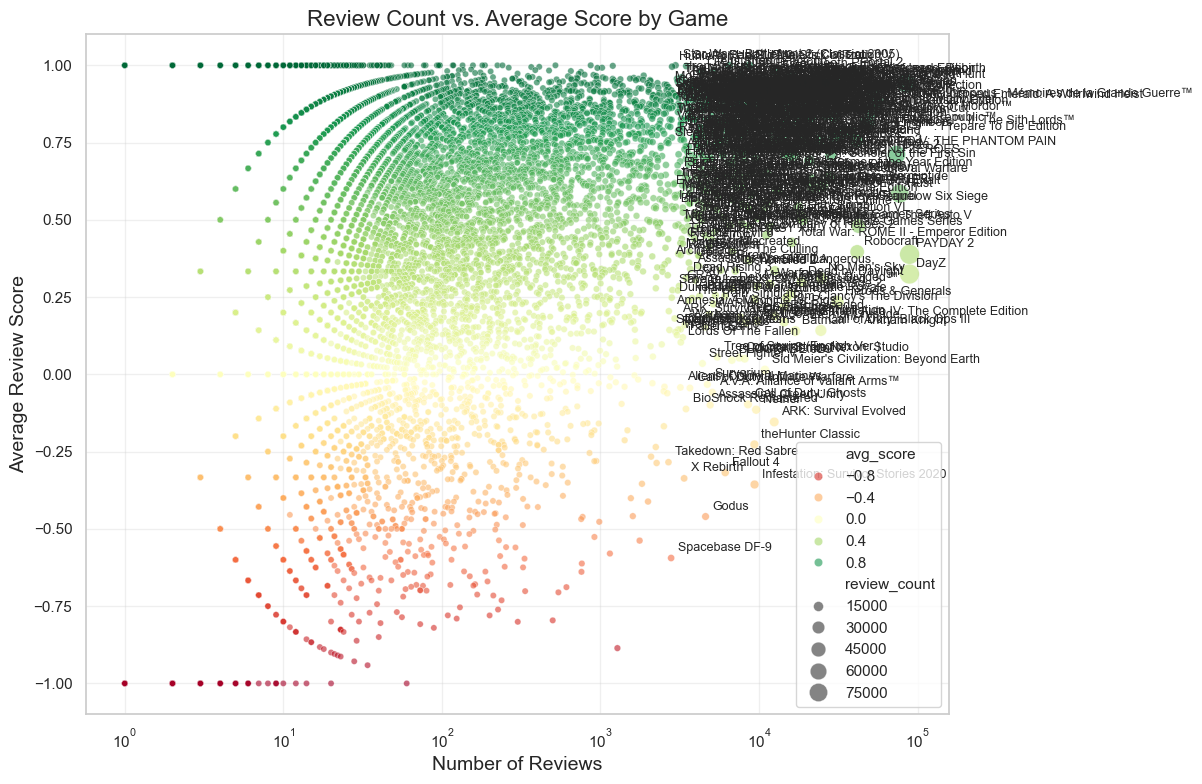

In [25]:
# Scatter plot of review count vs. average score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=game_avg_scores, x='review_count', y='avg_score', alpha=0.6, size='review_count', 
                sizes=(20, 200), hue='avg_score', palette='RdYlGn')

# Add labels to notable points (high review count or extreme scores)
for idx, row in game_avg_scores[game_avg_scores['review_count'] > game_avg_scores['review_count'].quantile(0.95)].iterrows():
    plt.annotate(row['app_name'], (row['review_count'], row['avg_score']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Review Count vs. Average Score by Game', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.xscale('log')  # Log scale for better visualization if there's high variance
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Review Score Analysis

In [26]:
# Distribution of review scores
score_counts = df['review_score'].value_counts().sort_index().reset_index()
score_counts.columns = ['review_score', 'count']
score_counts['percentage'] = (score_counts['count'] / len(df)) * 100

print("Distribution of Review Scores:")
score_counts

Distribution of Review Scores:


,review_score,count,percentage
0,-1,1156686,18.03
1,1,5260420,81.97


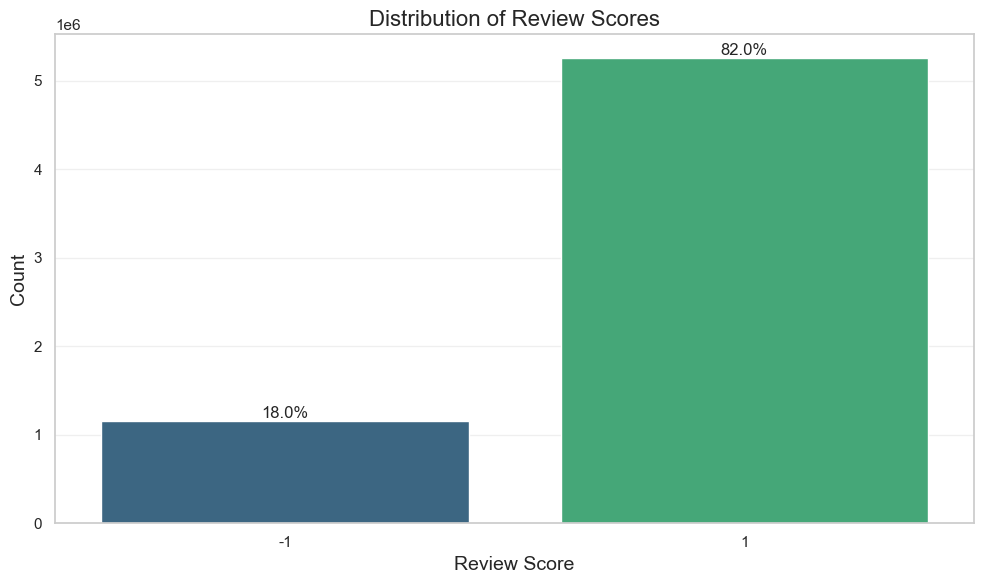

In [27]:
# Visualize the distribution of review scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=score_counts, x='review_score', y='count', palette='viridis')

# Add percentage labels on top of bars
for i, row in score_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']:.1f}%", ha='center', va='bottom')

plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Review Votes Analysis

In [28]:
# Distribution of review votes
print("Distribution of Review Votes:")
vote_stats = df['review_votes'].describe()
vote_stats

Distribution of Review Votes:


count   6417106.00
mean          0.15
std           0.35
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: review_votes, dtype: float64

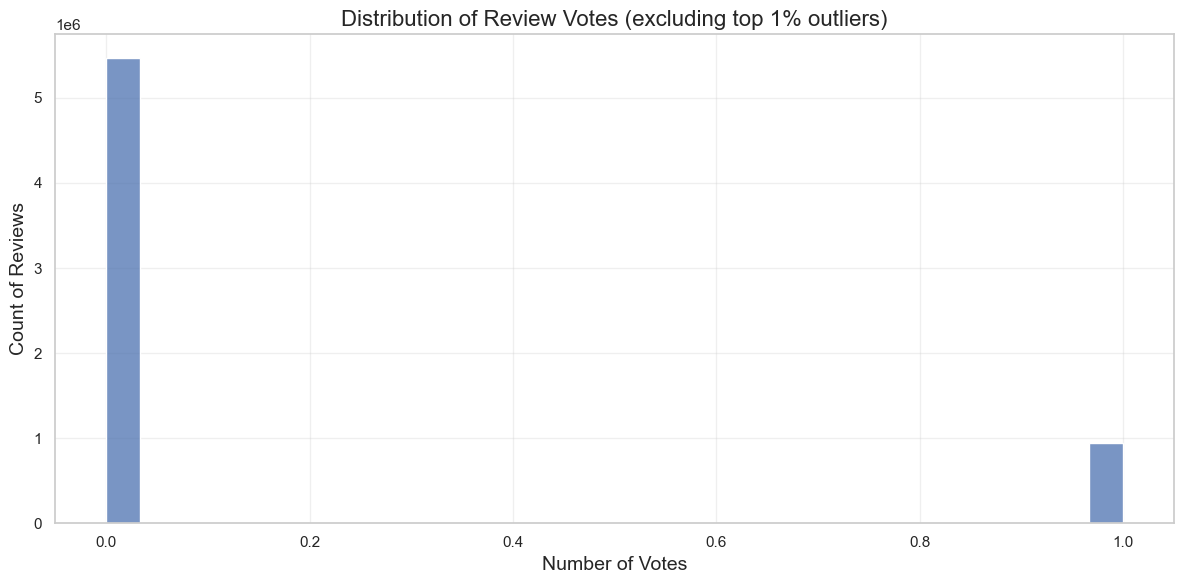

In [29]:
# Create bins for review votes to better visualize the distribution
max_votes_to_display = df['review_votes'].quantile(0.99)  # Ignore extreme outliers
df_for_plot = df[df['review_votes'] <= max_votes_to_display]

plt.figure(figsize=(12, 6))
sns.histplot(df_for_plot['review_votes'], bins=30, kde=False)
plt.title(f'Distribution of Review Votes (excluding top 1% outliers)', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Relationship between review score and votes
vote_by_score = df.groupby('review_score')['review_votes'].agg(['mean', 'median', 'count']).reset_index()
print("Average and Median Votes by Review Score:")
vote_by_score

Average and Median Votes by Review Score:


,review_score,mean,median,count
0,-1,0.24,0.00,1156686
1,1,0.13,0.00,5260420


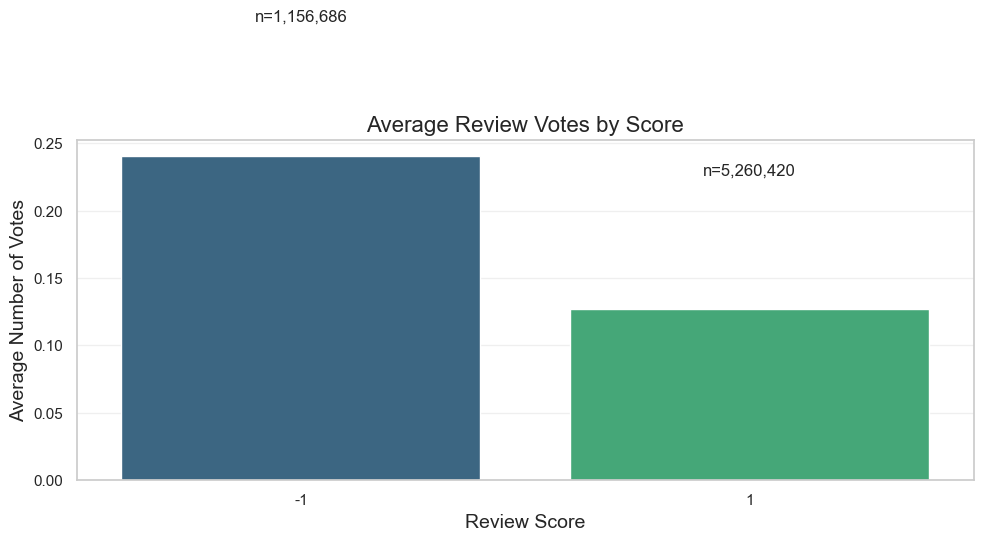

In [31]:
# Visualize relationship between review score and votes
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vote_by_score, x='review_score', y='mean', palette='viridis')

# Add review count as text
for i, count in enumerate(vote_by_score['count']):
    ax.text(i, vote_by_score['mean'].iloc[i] + 0.1, f"n={count:,}", ha='center')

plt.title('Average Review Votes by Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Average Number of Votes', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [32]:
# Reviews with most votes
top_voted_reviews = df.sort_values('review_votes', ascending=False).head(10)
print("Top 10 Most Voted Reviews:")
top_voted_reviews[['app_name', 'review_score', 'review_votes', 'review_text']]

Top 10 Most Voted Reviews:


,app_name,review_score,review_votes,review_text
3066305,Out There Somewhere,-1,1,"Don't say another ♥♥♥♥♥♥♥ word. Up until now, ..."
1486359,Insurgency,-1,1,"This is a great game, just many problems. Firs..."
361645,Silent Hunter III,1,1,Silent Hunter 3 is likely the best Submarine S...
2865195,Rocket League,1,1,more like cocket league heyooooooooooooooooo
1694029,Euro Truck Simulator 2,1,1,"You may think this game boring , , I certainly..."
361648,Silent Hunter III,1,1,It's 1944. January. The Wermancht is slowly ...
2865196,Rocket League,1,1,pros -great gameplay -really hard to master -g...
6417095,Puzzle Pirates,-1,1,"A very good game, got sick of it after a while..."
1878034,Killing Floor 2,1,1,This game is so Metal
1878035,Killing Floor 2,1,1,Feels bad for the janitor


## 6. Review Text Analysis

In [33]:
# Add column for review text length
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))
df['review_word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Basic statistics on review text length
print("Review Text Length Statistics:")
length_stats = df[['review_length', 'review_word_count']].describe().T
length_stats

Review Text Length Statistics:


,count,mean,std,min,25%,50%,75%,max
review_length,6417106.00,304.08,599.87,1.00,30.00,104.00,310.00,8873.00
review_word_count,6417106.00,55.38,108.02,0.00,6.00,19.00,57.00,4000.00


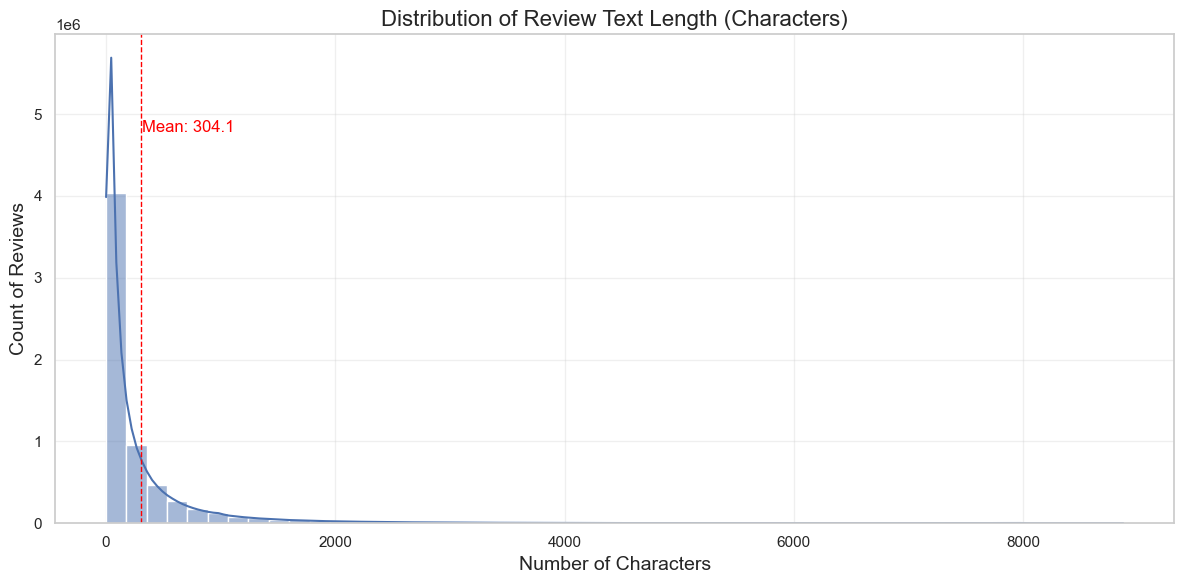

In [34]:
# Distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.axvline(df['review_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['review_length'].mean() + 10, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {df["review_length"].mean():.1f}', color='red')

plt.title('Distribution of Review Text Length (Characters)', fontsize=16)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

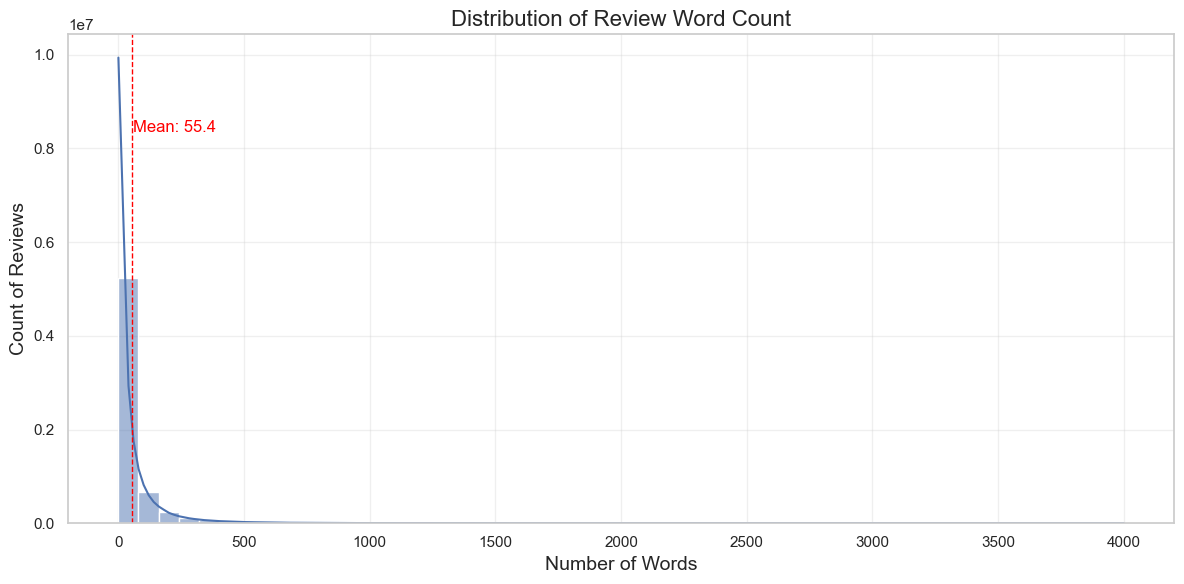

In [35]:
# Distribution of review word counts
plt.figure(figsize=(12, 6))
sns.histplot(df['review_word_count'], bins=50, kde=True)
plt.axvline(df['review_word_count'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['review_word_count'].mean() + 2, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {df["review_word_count"].mean():.1f}', color='red')

plt.title('Distribution of Review Word Count', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

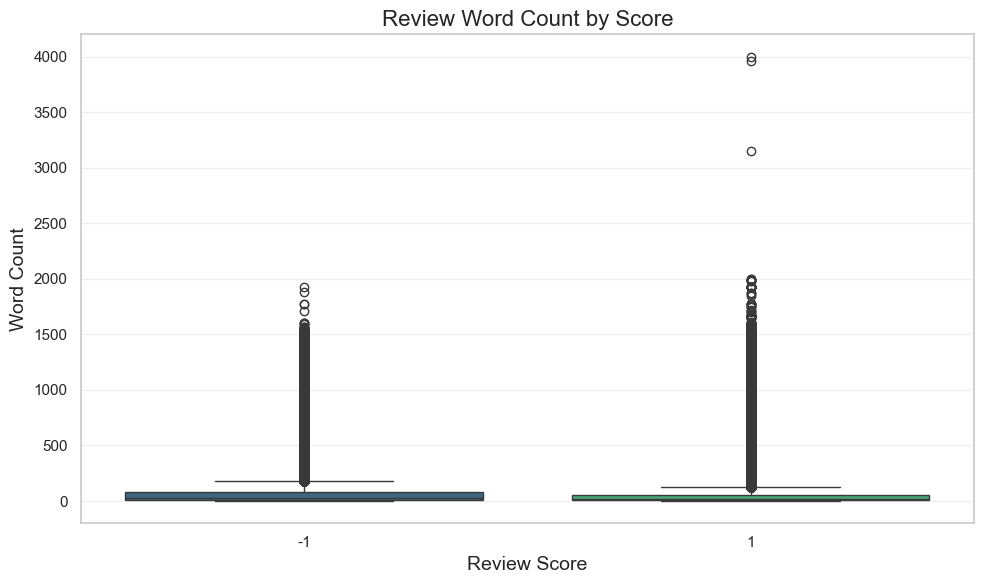

In [36]:
# Compare review length by score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='review_score', y='review_word_count', palette='viridis')
plt.title('Review Word Count by Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Word Count', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Relationships between Variables

In [38]:
# Correlation between numeric variables
numeric_df = df[['review_score', 'review_votes', 'review_length', 'review_word_count']]
correlation = numeric_df.corr()

print("Correlation Between Numeric Variables:")
correlation

Correlation Between Numeric Variables:


,review_score,review_votes,review_length,review_word_count
review_score,1.00,-0.12,-0.06,-0.07
review_votes,-0.12,1.00,0.05,0.05
review_length,-0.06,0.05,1.00,0.99
review_word_count,-0.07,0.05,0.99,1.00


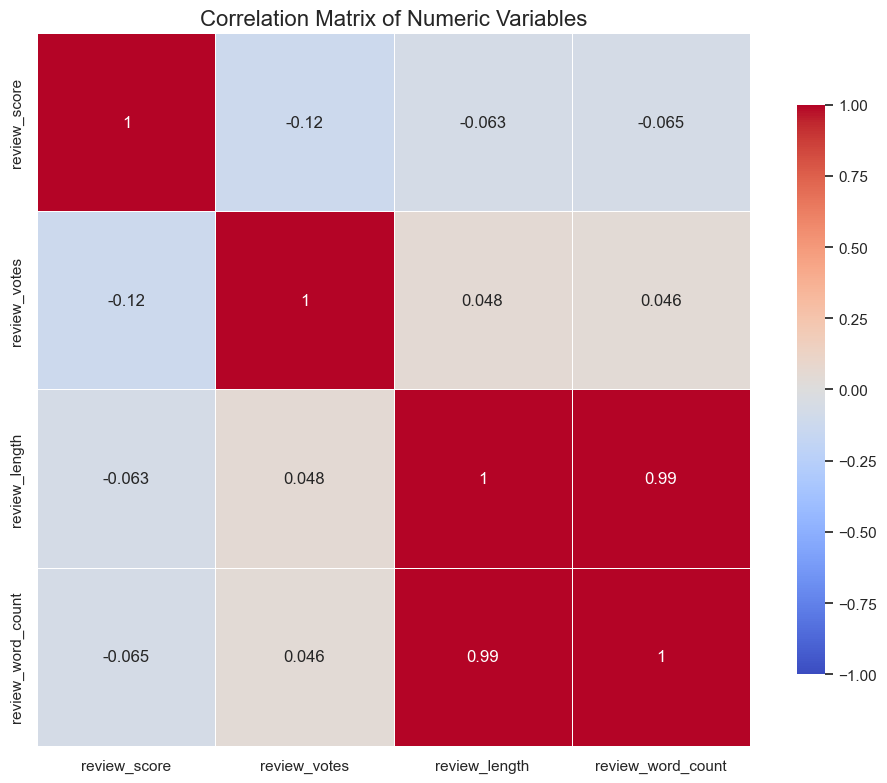

In [39]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

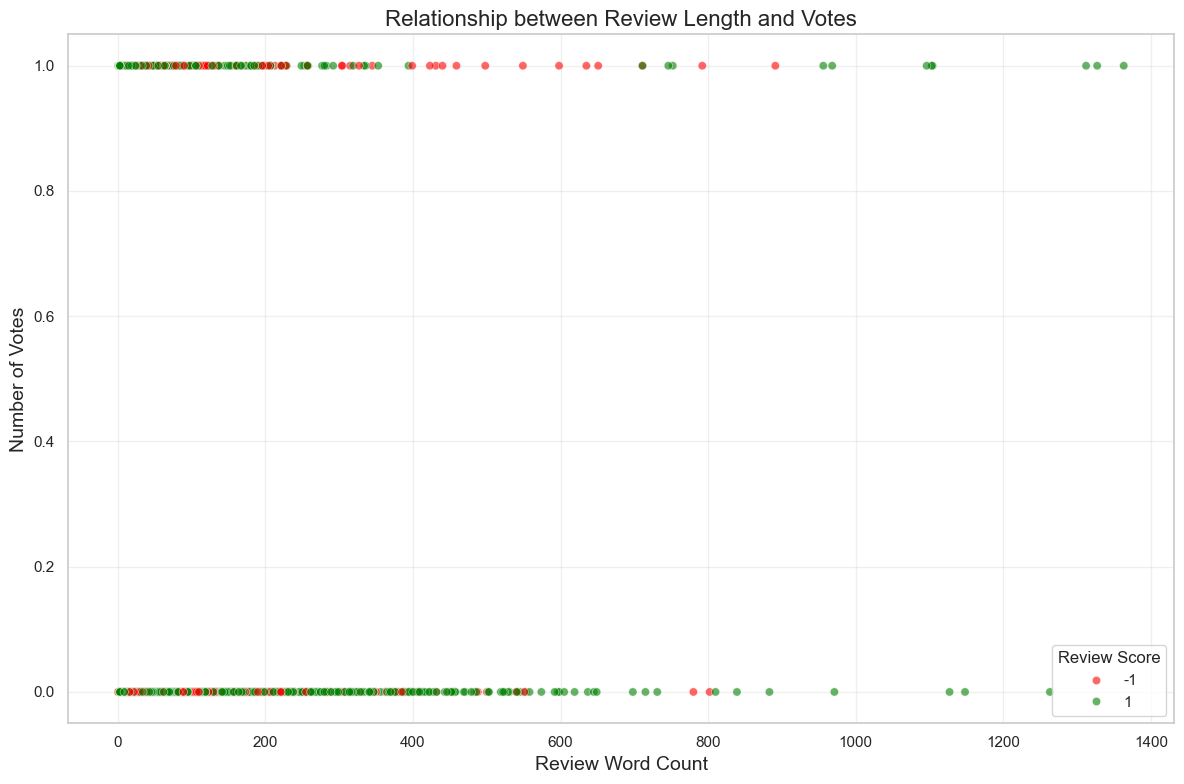

In [41]:
# Scatter plot of review length vs votes with score as color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df.sample(min(5000, len(df)), random_state=42), 
                x='review_word_count', y='review_votes', 
                hue='review_score', palette={-1: 'red', 0: 'gray', 1: 'green'}, alpha=0.6)
plt.title('Relationship between Review Length and Votes', fontsize=16)
plt.xlabel('Review Word Count', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.legend(title='Review Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()